In [1]:
from utilities import MuscleAlign_wrapper, Weblogo
from IPython.display import Image, display
from utilities import PWM

In [2]:
# motives as list of lists - sample output from meme_wrapper

motives = [
    #Motif 1
    [('male', 'TGTAACAGAGATCACACAA'),
     ('ompa', 'CCTGACGGAGTTCACACTT'),
     ('lac', 'TGTGAGTTAGCTCACTCAT'),
     ('tdc', 'TGTGAGTGGTCGCACATAT'),
     ('pbr322', 'TGTGAAATACCGCACAGAT'),
     ('tnaa', 'TGTGATTCGATTCACATTT'),
     ('deop2', 'TTTGAACCAGATCGCATTA'),
     ('ce1cg', 'TTTGATCGTTTTCACAAAA'),
     ('ara', 'TTTGCACGGCGTCACACTT'),
     ('bglr1', 'TGTGAGCATGGTCATATTT'),
     ('crp', 'TGCAAAGGACGTCACATTA'),
     ('malt', 'TGTGACACAGTGCAAATTC'),
     ('gale', 'TGTAAACGATTCCACTAAT'),
     ('cya', 'TGTTAAATTGATCACGTTT'),
     ('uxu1', 'TGTGATGTGGTTAACCCAA'),
     ('ilv', 'CGTGATCAACCCCTCAATT'),
     ('gale', 'TGTCACACTTTTCGCATCT'),
     ('malk', 'CGTGATGTTGCTTGCAAAA')],
    
    #Motif 2
    [('pbr322', 'GGAGAAAATACCGC'),
     ('ce1cg', 'GGCGAGAATAGCGC'),
     ('gale', 'GCATAAAAAACGGC'),
     ('malk', 'GATGAGAACACGGC'),
     ('ara', 'GCAGAAAAGTCCAC'),
     ('trn9cat', 'GGCGAAAATGAGAC')],
    
    #Motif3
    [('lac', 'CCCCAGGCTTTACA'), 
     ('ce1cg', 'CCACAGTCTTGACA')]]

<h3>Stand-alone example of WebLogo wrapper</h3>

In [3]:
logos=[]
wb = Weblogo(output_format='png', sequence_type = 'dna', resolution=200, fineprint=' ')

for i in range(len(motives)):
    logo_image = wb.create_logo(seqs=motives[i])
    logos.append(logo_image)

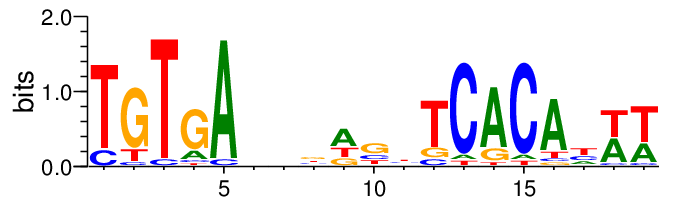

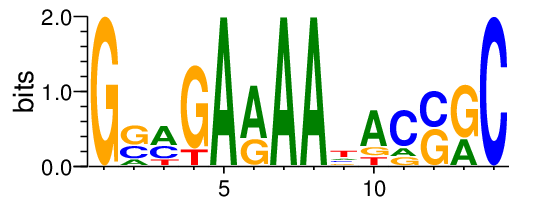

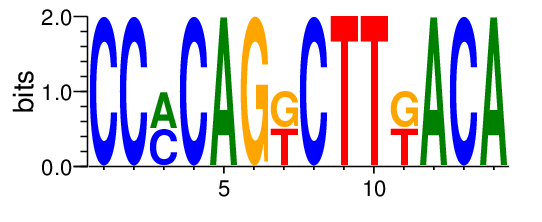

In [4]:
for i in range(len(motives)):
    display(Image(logos[i]))

<h3>Stand-alone example of Muscle wrapper</h3>

In [5]:
aligned_motives=[]
ma = MuscleAlign_wrapper(diags=False, maxiters = 16, maxhours = None)

for i in range(len(motives)):
    aligned_motives.append( ma.transform(seqs=motives[i]) )

In [6]:
for i in range(len(motives)):
    print 'Motif %d:'%(i+1)
    for am in aligned_motives[i]: print am
    print

Motif 1:
('male', 'TGTAACAGAGATCACACAA')
('ompa', 'CCTGACGGAGTTCACACTT')
('lac', 'TGTGAGTTAGCTCACTCAT')
('tdc', 'TGTGAGTGGTCGCACATAT')
('pbr322', 'TGTGAAATACCGCACAGAT')
('tnaa', 'TGTGATTCGATTCACATTT')
('deop2', 'TTTGAACCAGATCGCATTA')
('ce1cg', 'TTTGATCGTTTTCACAAAA')
('ara', 'TTTGCACGGCGTCACACTT')
('bglr1', 'TGTGAGCATGGTCATATTT')
('crp', 'TGCAAAGGACGTCACATTA')
('malt', 'TGTGACACAGTGCAAATTC')
('gale', 'TGTAAACGATTCCACTAAT')
('cya', 'TGTTAAATTGATCACGTTT')
('uxu1', 'TGTGATGTGGTTAACCCAA')
('ilv', 'CGTGATCAACCCCTCAATT')
('gale', 'TGTCACACTTTTCGCATCT')
('malk', 'CGTGATGTTGCTTGCAAAA')

Motif 2:
('pbr322', 'GGAGAAAATACCGC')
('ce1cg', 'GGCGAGAATAGCGC')
('gale', 'GCATAAAAAACGGC')
('malk', 'GATGAGAACACGGC')
('ara', 'GCAGAAAAGTCCAC')
('trn9cat', 'GGCGAAAATGAGAC')

Motif 3:
('lac', 'CCCCAGGCTTTACA')
('ce1cg', 'CCACAGTCTTGACA')



<h3>PWM Example</h3>

In [7]:
pwm1 = PWM(alphabet='dna', pseudocounts=0)
pwm1.fit(motives)

pwm1.display()

        0      1      2      3      4      5      6      7      8      9     10     11     12     13     14     15     16     17     18
A:   0.00   0.00   0.00   0.17   0.94   0.33   0.28   0.11   0.50   0.06   0.17   0.00   0.06   0.78   0.06   0.78   0.22   0.44   0.33
C:   0.17   0.06   0.06   0.06   0.06   0.22   0.33   0.22   0.00   0.22   0.28   0.11   0.89   0.00   0.89   0.06   0.28   0.06   0.06
G:   0.00   0.78   0.00   0.72   0.00   0.17   0.22   0.39   0.22   0.50   0.17   0.17   0.00   0.17   0.00   0.06   0.06   0.00   0.00
T:   0.83   0.17   0.94   0.06   0.00   0.28   0.17   0.28   0.28   0.22   0.39   0.72   0.06   0.06   0.06   0.11   0.44   0.50   0.61

        0      1      2      3      4      5      6      7      8      9     10     11     12     13
A:   0.00   0.17   0.50   0.00   1.00   0.67   1.00   1.00   0.17   0.67   0.17   0.00   0.33   0.00
C:   0.00   0.33   0.33   0.00   0.00   0.00   0.00   0.00   0.17   0.00   0.67   0.50   0.00   1.00
G:   1.00   0.50

In [8]:
test_seq = 'GGAGAAAATACCGC' * 10
seq_score = pwm1.score(motif_num=2, seq=test_seq)
print seq_score

[0.010288065843621397, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.010288065843621397, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.010288065843621397, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.010288065843621397, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.010288065843621397, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.010288065843621397, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.010288065843621397, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.010288065843621397, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.010288065843621397, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.010288065843621397]


---